# ECE 253 Homework 1
#### Name: Sheng-Wei Chang
#### PID:  A53317226

Academic Integrity Policy: Integrity of scholarship is essential for an academic community. The University expects that both faculty and students will honor this principle and in so doing protect the validity of University intellectual work. For students, this means that all academic work will be done by the individual to whom it is assigned, without unauthorized aid of any kind. By including this in my report, I agree to abide by the Academic Integrity Policy mentioned above.

## Problem 1. Basics

In [1]:
import numpy as np

A = np.array([[3, 9, 5, 1], [4, 25, 4, 3], [63, 13, 23, 9], [6, 32, 77, 0], [12, 8, 6, 1]])
B = np.array([[0, 1, 0, 1], [0, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 0]])

In [2]:
# Problem (i)
C = np.multiply(A, B)
print('(i)')
print('Point-wise multiply A with B:')
print(C)

(i)
Point-wise multiply A with B:
[[ 0  9  0  1]
 [ 0 25  4  0]
 [ 0  0  0  9]
 [ 6 32  0  0]
 [ 0  8  0  0]]


In [3]:
# Problem (ii)
print('(ii)')
print('The inner product of the 2nd and 3rd row of C:')
print(np.dot(C[1], C[2]))

(ii)
The inner product of the 2nd and 3rd row of C:
0


In [4]:
# Problem (iii)
min_indices = np.where(C == np.min(C))
min_indices = np.concatenate((min_indices[0], min_indices[1]))
min_indices = min_indices.reshape((2,-1))
min_indices = min_indices.T
      
max_indices = np.where(C == np.max(C))
max_indices = np.concatenate((max_indices[0], max_indices[1]))
max_indices = max_indices.reshape((2,-1))
max_indices = max_indices.T

print('(iii)')
print('Minimum value in C:', np.min(C))
print('Maximum value in C:', np.max(C))
print('Indices of minimum value in C:')
print(min_indices)
print('Indices of axnimum value in C:')
print(max_indices)

(iii)
Minimum value in C: 0
Maximum value in C: 32
Indices of minimum value in C:
[[0 0]
 [0 2]
 [1 0]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [3 2]
 [3 3]
 [4 0]
 [4 2]
 [4 3]]
Indices of axnimum value in C:
[[3 1]]


## Problem 2. Simple image manipulation

In [5]:
import matplotlib.pyplot as plt
import copy

# Problem (i)
A = plt.imread('images/dog.jpg')

# Problem (ii)
r, g, b = A[:, :, 0], A[:, :, 1], A[:, :, 2]
B = 0.299 * r + 0.587 * g + 0.114 * b

# Problem (iii)
C = np.empty_like(B)
C[:] = B[:]+15
C[C > 255] = 255

# Problem (iv)
D = B[::-1, ::-1]

# Problem (v)
median = np.median(B)
E = copy.deepcopy(B)
E[E <= median], E[E > median] = 0, 1
E = 1-E

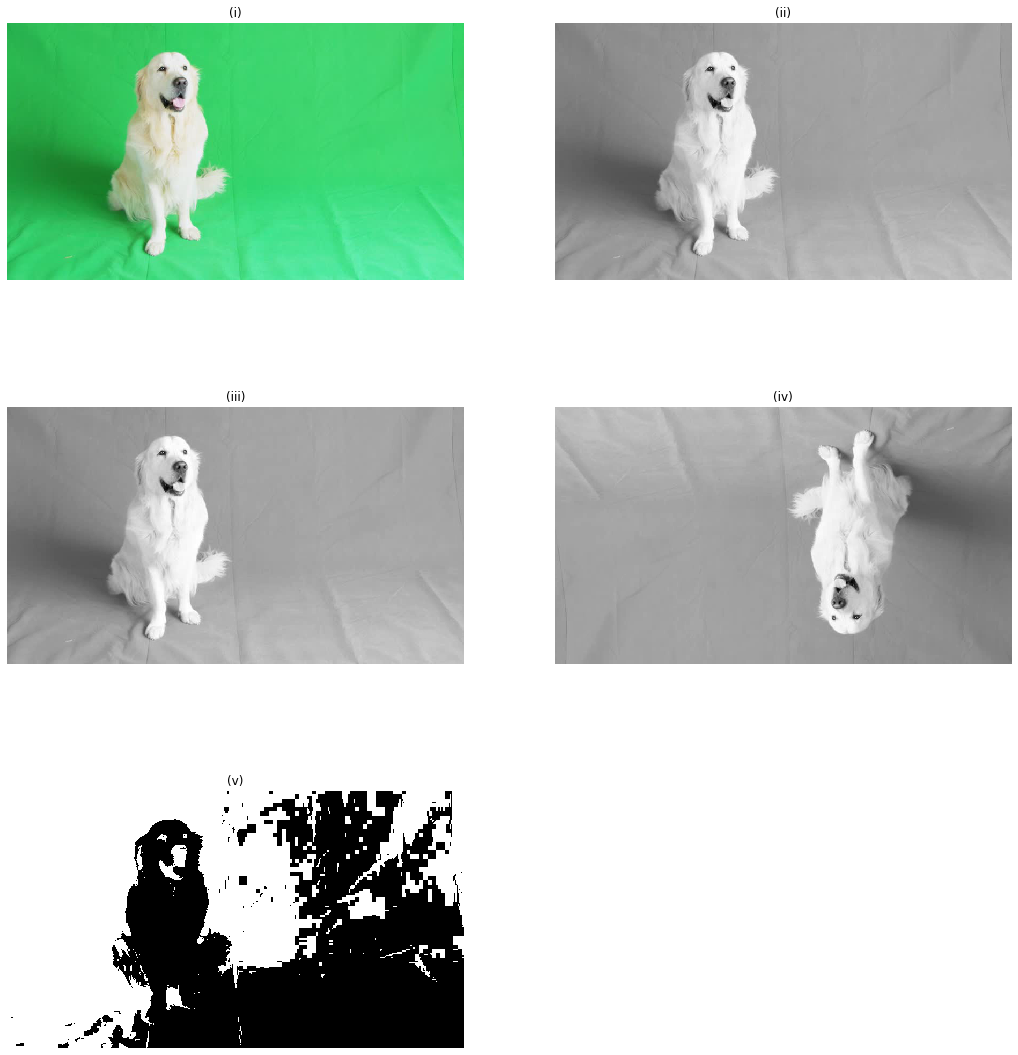

In [6]:
plt.figure(figsize=(18,20))
plt.subplot(3,2,1)
plt.title('(i)')
plt.axis('off')
plt.imshow(A)

plt.subplot(3,2,2)
plt.title('(ii)')
plt.axis('off')
plt.imshow(B, cmap='gray')

plt.subplot(3,2,3)
plt.title('(iii)')
plt.axis('off')
plt.imshow(C, cmap='gray')

plt.subplot(3,2,4)
plt.title('(iv)')
plt.axis('off')
plt.imshow(D, cmap='gray')

plt.subplot(3,2,5)
plt.title('(v)')
plt.axis('off')
plt.imshow(E, cmap='gray')

plt.show()

## Problem 3. Histograms

In [7]:
def compute_norm_rgb_histogram(img):
    _, R = np.unique(A[:,:,0]//8, return_counts=True)
    _, G = np.unique(A[:,:,1]//8, return_counts=True)
    _, B = np.unique(A[:,:,2]//8, return_counts=True)
    
    H = np.concatenate((R,G,B))
    return H / (img.shape[0] * img.shape[1])

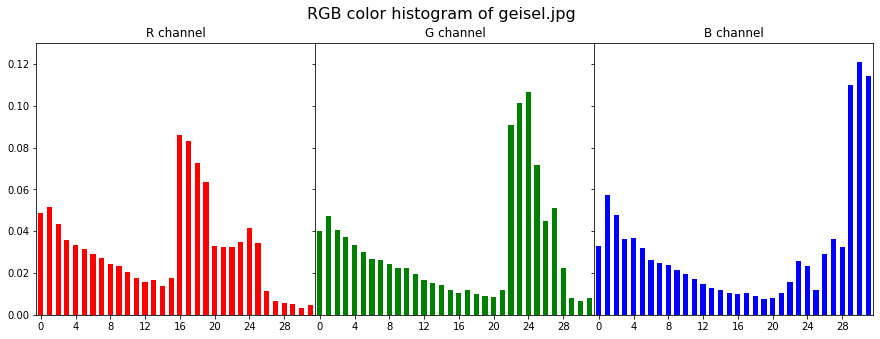

In [8]:
A = plt.imread('images/geisel.jpg')
res = compute_norm_rgb_histogram(A)

fig, axs = plt.subplots(1, 3, sharey=True)
fig.set_size_inches((15,5))
fig.suptitle('RGB color histogram of geisel.jpg', fontsize=16)
fig.subplots_adjust(wspace=0) # Remove vertical space between axes

# Plot each graph
axs[0].bar(range(32), res[0:32], width=0.6, color='r')
axs[0].set_title('R channel')
axs[0].set_xticks(np.arange(0, 32, 4))
axs[0].set_yticks(np.arange(0, 0.13, 0.02))
axs[0].set_xlim(-0.5, 31.6)
axs[0].set_ylim(0, 0.13)

axs[1].bar(range(32), res[32:64], width=0.6, color='g')
axs[1].set_title('G channel')
axs[1].set_xticks(np.arange(0, 32, 4))
axs[1].set_yticks(np.arange(0, 0.13, 0.02))
axs[1].set_xlim(-0.5, 31.6)
axs[1].set_ylim(0, 0.13)

axs[2].bar(range(32), res[64:96], width=0.6, color='b')
axs[2].set_title('B channel')
axs[2].set_xticks(np.arange(0, 32, 4))
axs[2].set_yticks(np.arange(0, 0.13, 0.02))
axs[2].set_xlim(-0.5, 31.6)
axs[2].set_ylim(0, 0.13)

plt.show()

## Problem 4. Chroma Keying

In [9]:
def foreground_man(img, background):
    mask = np.zeros_like(img)
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    mask = (G < 100) | (R > G) | (B > G)
    binary = np.where(mask, 1, 0)
    
    foreground = np.zeros_like(img)
    zero = np.zeros_like(img)
    foreground[:,:,0] = np.where(mask, img[:,:,0], zero[:,:,0])
    foreground[:,:,1] = np.where(mask, img[:,:,2], zero[:,:,1])
    foreground[:,:,2] = np.where(mask, img[:,:,2], zero[:,:,2])
    
    comb = copy.deepcopy(background)
    h, w = img.shape[0], img.shape[1]
    x, y = 50, 48
    comb[y:y+h,x:x+w,0] = np.where(mask, img[:,:,0], comb[y:y+h,x:x+w,0])
    comb[y:y+h,x:x+w,1] = np.where(mask, img[:,:,2], comb[y:y+h,x:x+w,1])
    comb[y:y+h,x:x+w,2] = np.where(mask, img[:,:,2], comb[y:y+h,x:x+w,2])
    
    return binary, foreground, comb

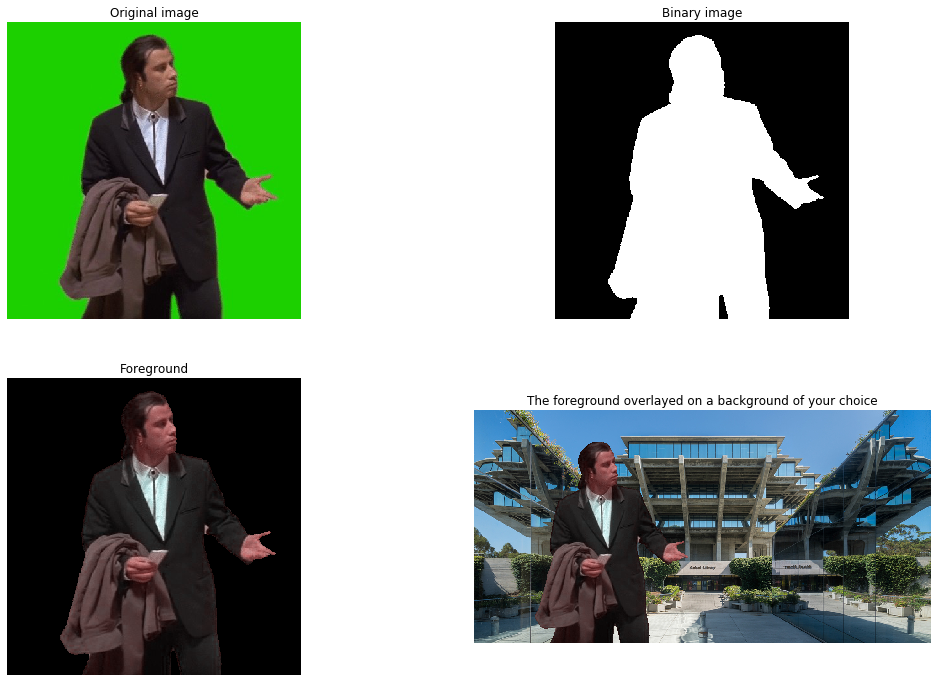

In [10]:
man = plt.imread('images/travolta.jpg')
lib = plt.imread('images/library.jpg')
man_binary, man_fore, man_comb = foreground_man(man, lib)

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(man)

plt.subplot(2,2,2)
plt.title('Binary image')
plt.axis('off')
plt.imshow(man_binary, cmap='gray')

plt.subplot(2,2,3)
plt.title('Foreground')
plt.axis('off')
plt.imshow(man_fore)

plt.subplot(2,2,4)
plt.title('The foreground overlayed on a background of your choice')
plt.axis('off')
plt.imshow(man_comb)

plt.show()

In [11]:
def foreground_dog(img, background):
    mask = np.zeros_like(img)
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    mask = (G < 110) | (R > 120) | (B > 190)
    binary = np.where(mask, 1, 0)
    
    foreground = np.zeros_like(img)
    zero = np.zeros_like(img)
    foreground[:,:,0] = np.where(mask, img[:,:,0], zero[:,:,0])
    foreground[:,:,1] = np.where(mask, img[:,:,2], zero[:,:,1])
    foreground[:,:,2] = np.where(mask, img[:,:,2], zero[:,:,2])
    
    comb = copy.deepcopy(background)
    h, w = img.shape[0], img.shape[1]
    x, y = 200, 300
    comb[y:y+h,x:x+w,0] = np.where(mask, img[:,:,0], comb[y:y+h,x:x+w,0])
    comb[y:y+h,x:x+w,1] = np.where(mask, img[:,:,2], comb[y:y+h,x:x+w,1])
    comb[y:y+h,x:x+w,2] = np.where(mask, img[:,:,2], comb[y:y+h,x:x+w,2])
    
    return binary, foreground, comb

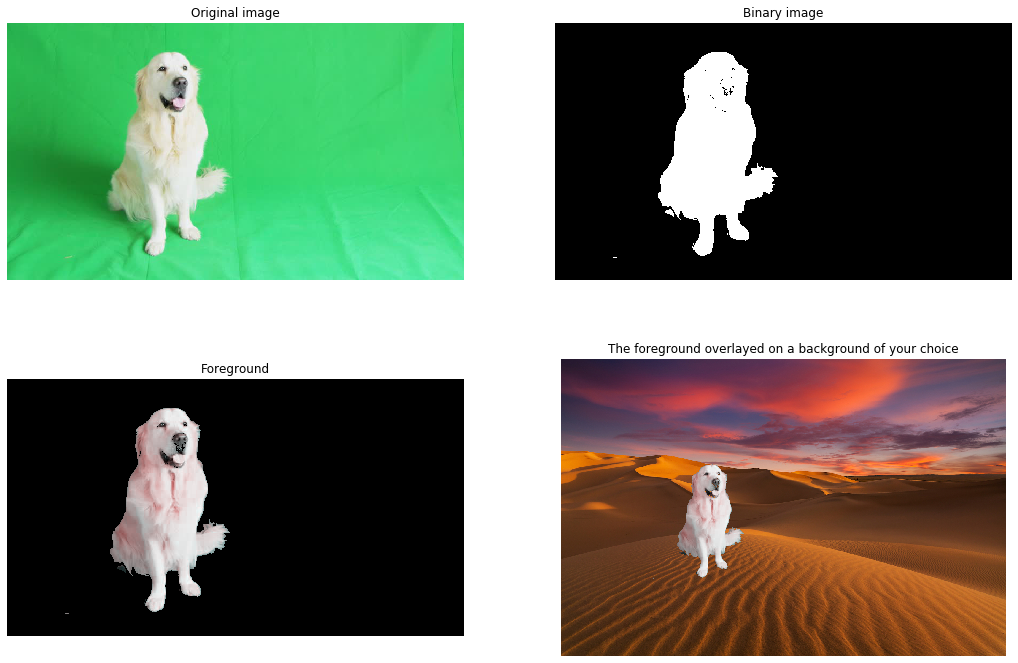

In [12]:
dog = plt.imread('images/dog.jpg')
desert = plt.imread('images/desert.jpg')
dog_binary, dog_fore, dog_comb = foreground_dog(dog, desert)

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(dog)

plt.subplot(2,2,2)
plt.title('Binary image')
plt.axis('off')
plt.imshow(dog_binary, cmap='gray')

plt.subplot(2,2,3)
plt.title('Foreground')
plt.axis('off')
plt.imshow(dog_fore)

plt.subplot(2,2,4)
plt.title('The foreground overlayed on a background of your choice')
plt.axis('off')
plt.imshow(dog_comb)

plt.show()

## Problem 5. Upsampling and downsampling

(i) List (and describe in a short paragraph) 3 interpolation methods.

(a) Nearest-neighbor interpolation  
    This is the simplest method. The nearest-neighbor interpolation method only considers the values of the nearest neighbor to get interpolation. Those empty pixels will be filled up with value of the nearest pixel. The values of the points are not considered. In general, the result of this method are not pretty good.
    
(b) Bilinear interpolation  
    Mathematically, this is a kind of extension of linear interpolation. Instead of using the only one neareast pixel, this method considers four values near the target, two in X-axis and two in Y-axis. The main idea is to implement linear interpolation on both the X-axis and Y-axis. Also, this the default method used by the "resize" function in Python OpenCV.

(c) Bicubic interpolation  
    Mathematically, this is a kind of extension of cubic interpolation. Instead of taking 4 neighbors' values, this method considers 16 values. The bicubic interpolation takes 4×4 square pixels and calculates their weighted arithmetic mean for resampling.

In [13]:
import cv2

beetle = cv2.imread('images/beetle.jpg')
lights = cv2.imread('images/lights.jpg')
rubiks = cv2.imread('images/rubiks.jpg')

(ii) Downsampling


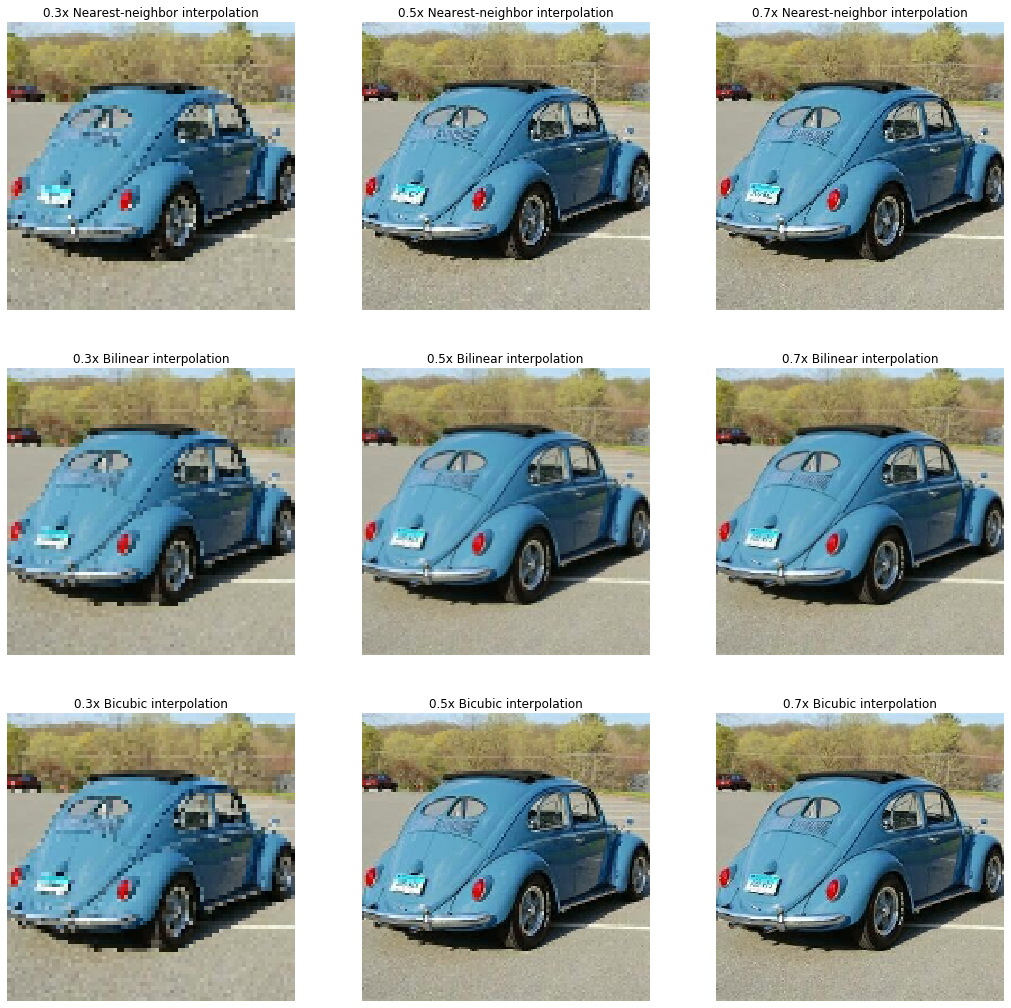

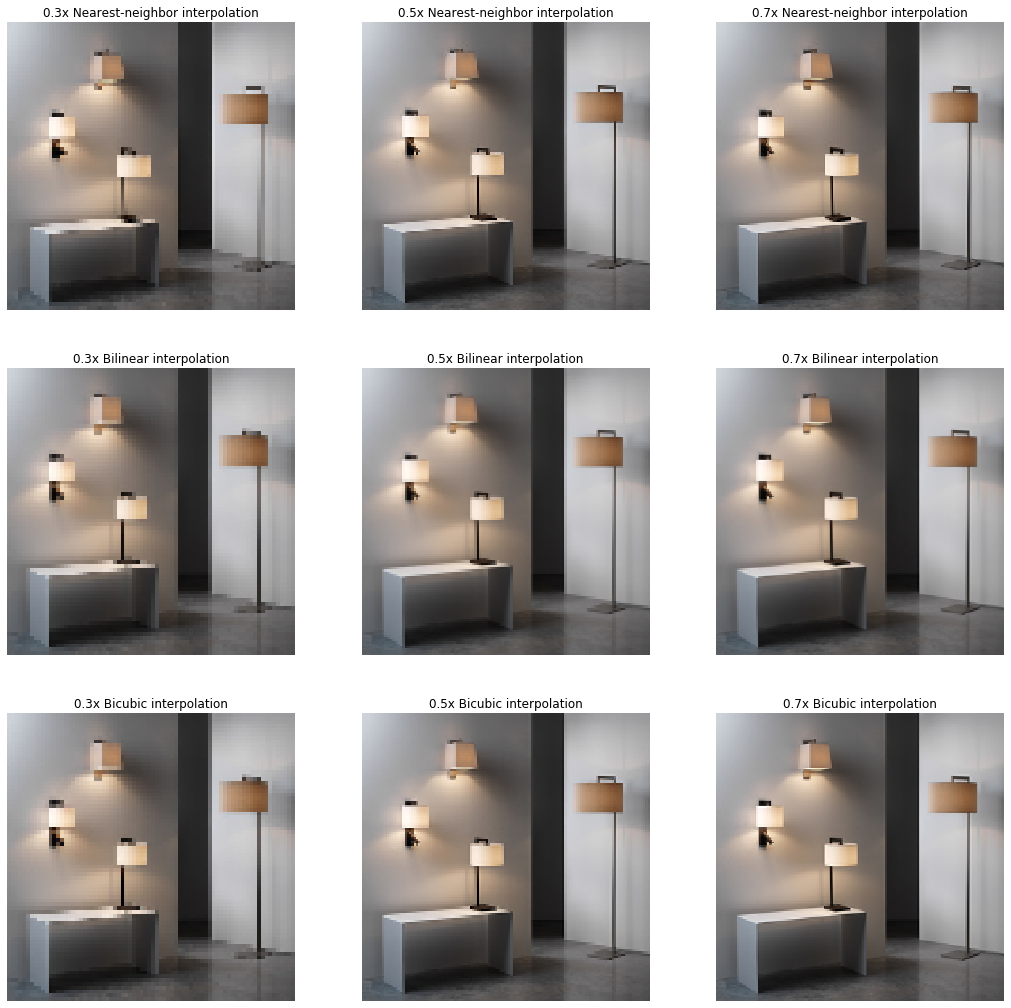

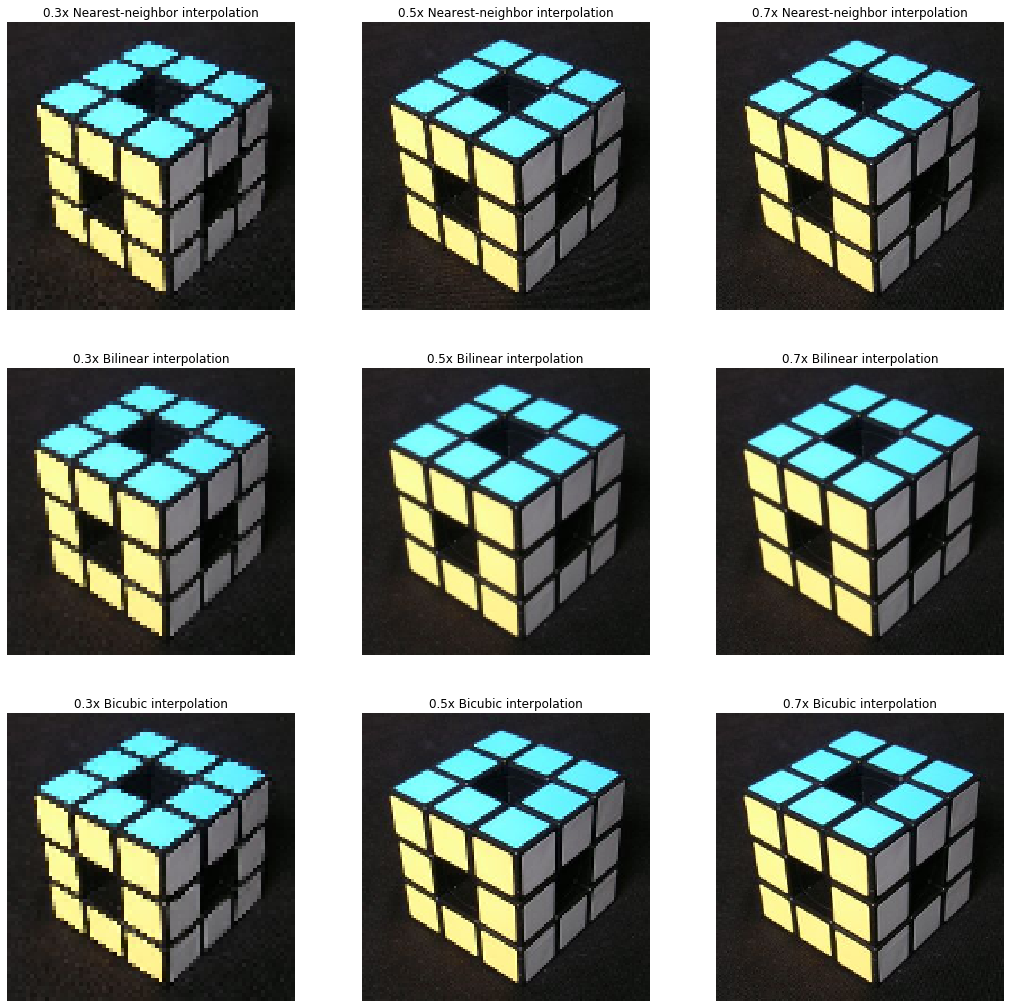

In [14]:
# downsampling

inter = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]
ratio = [0.3, 0.5, 0.7]
title =  ['0.3x Nearest-neighbor interpolation', 
          '0.5x Nearest-neighbor interpolation',
          '0.7x Nearest-neighbor interpolation',
          '0.3x Bilinear interpolation',
          '0.5x Bilinear interpolation',
          '0.7x Bilinear interpolation',
          '0.3x Bicubic interpolation',
          '0.5x Bicubic interpolation',
          '0.7x Bicubic interpolation']
beetle_ds = []
lights_ds = []
rubiks_ds = []

for i in range(len(inter)):
    for j in range(len(ratio)):
        # beetle
        beetle_size = (int(beetle.shape[1]*ratio[j]), int(beetle.shape[0]*ratio[j]))
        beetle_ds.append(cv2.resize(beetle, beetle_size, interpolation=inter[i]))
        # lights
        lights_size = (int(lights.shape[1]*ratio[j]), int(lights.shape[0]*ratio[j]))
        lights_ds.append(cv2.resize(lights, lights_size, interpolation=inter[i]))
        # rubiks
        rubiks_size = (int(rubiks.shape[1]*ratio[j]), int(rubiks.shape[0]*ratio[j]))
        rubiks_ds.append(cv2.resize(rubiks, rubiks_size, interpolation=inter[i]))

# transform image to rgb    
for i in range(len(inter)*len(ratio)):
    beetle_ds[i] = beetle_ds[i][:,:,::-1]
    lights_ds[i] = lights_ds[i][:,:,::-1]
    rubiks_ds[i] = rubiks_ds[i][:,:,::-1]

print('(ii) Downsampling')

plt.figure(figsize=(18,18))
for i in range(len(inter)*len(ratio)):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(beetle_ds[i])

plt.figure(figsize=(18,18))
for i in range(len(inter)*len(ratio)):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(lights_ds[i])

plt.figure(figsize=(18,18))
for i in range(len(inter)*len(ratio)):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(rubiks_ds[i])


What differences do you observe? Which interpolation method do you think works best?  
In 0.3x downsampling, those results are similar, looks like a lot of grids. I think the main reason is that the pixels are not enough to show a beautiful image of the original one. It doesn't matter which method we choose. In 0.5x downsampling, the results by Bilinear interpolation look blur, just like a painting. They are not as sharp as the results of Bicubic interpolation. In 0.7x downsampling, the edges in the results of Bicubic interpolation look even sharper. I think this image looks very similar to the original one. In general, I think Bicubic interpolation works best for downsampling.

(iii) Upsampling


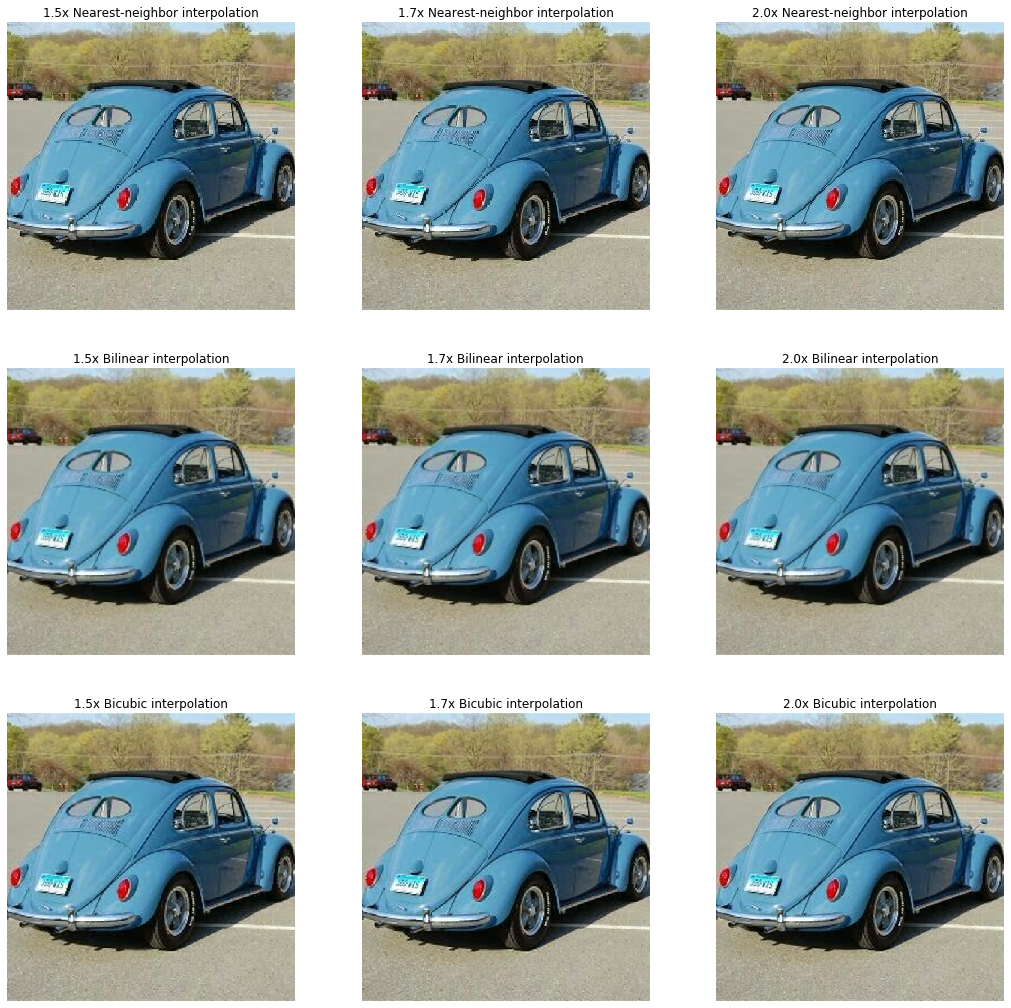

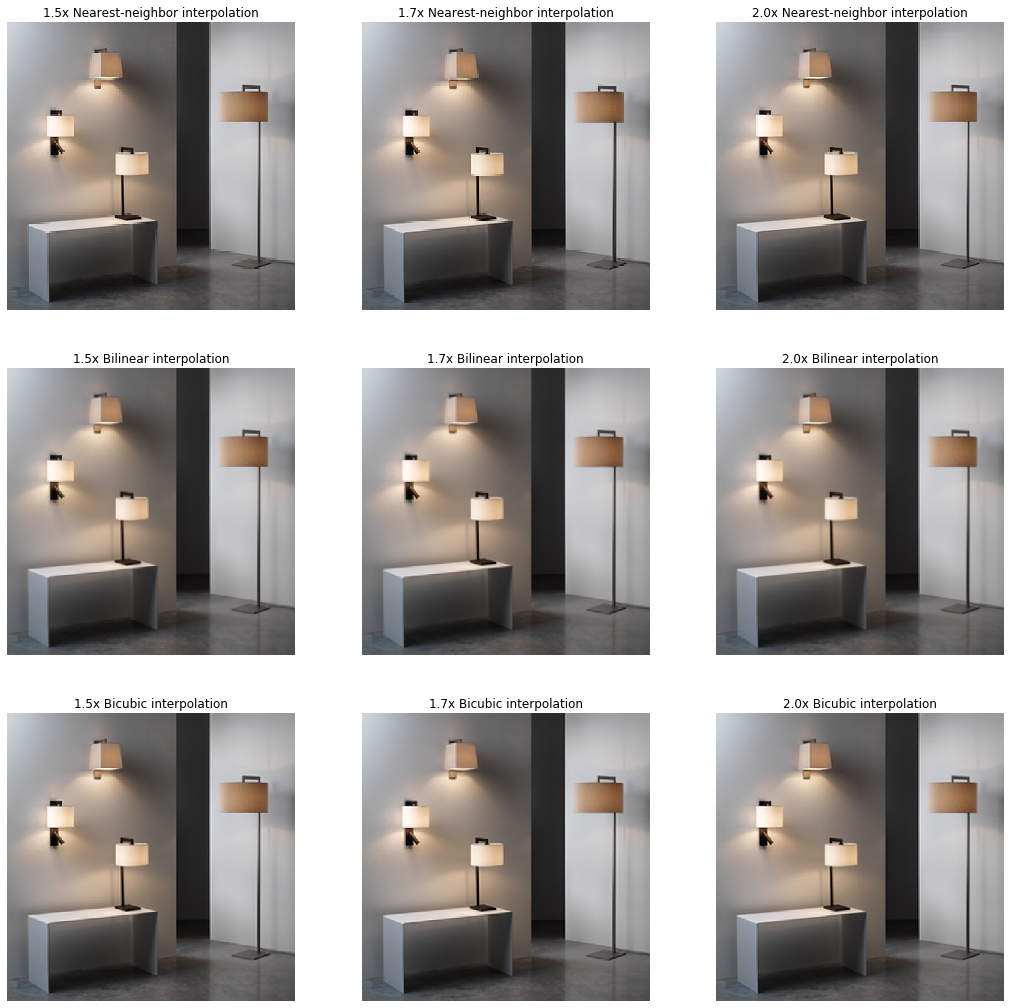

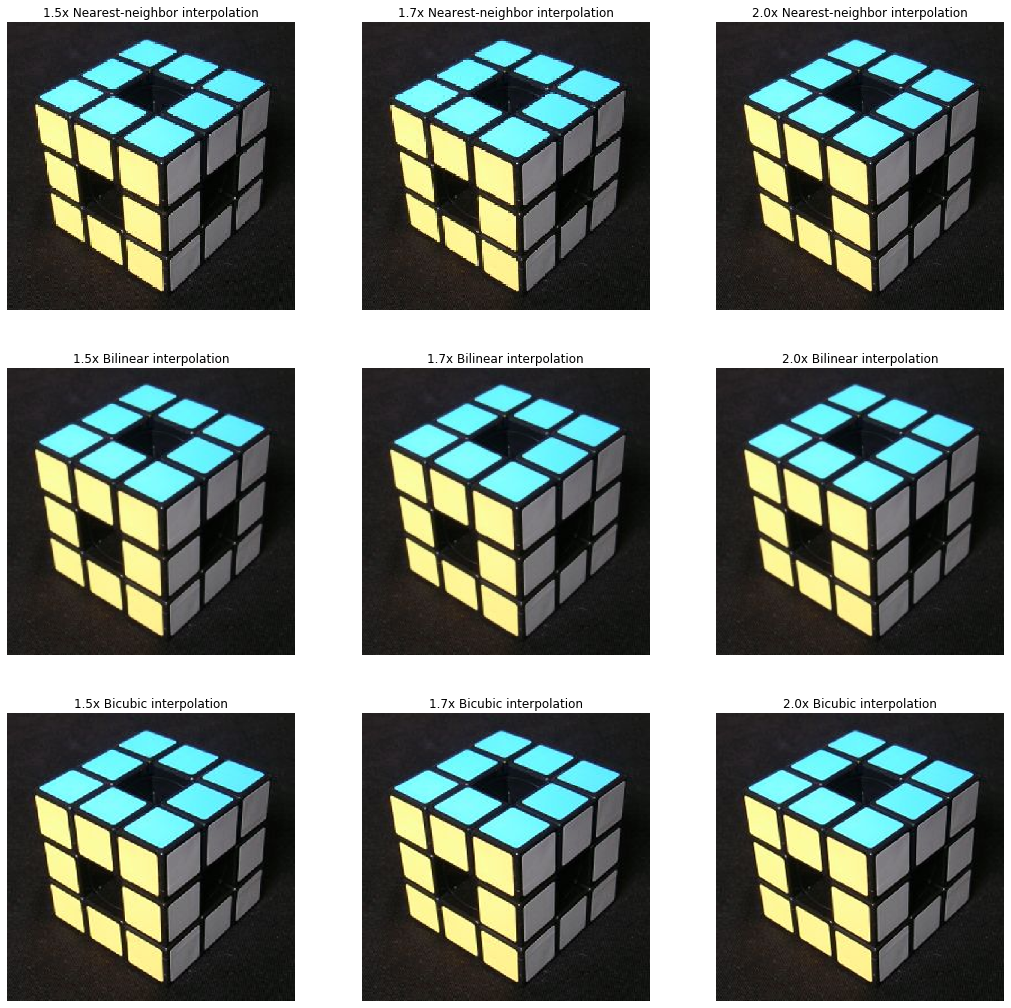

In [15]:
# upsampling

inter = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]
ratio = [1.5, 1.7, 2]
title =  ['1.5x Nearest-neighbor interpolation', 
          '1.7x Nearest-neighbor interpolation',
          '2.0x Nearest-neighbor interpolation',
          '1.5x Bilinear interpolation',
          '1.7x Bilinear interpolation',
          '2.0x Bilinear interpolation',
          '1.5x Bicubic interpolation',
          '1.7x Bicubic interpolation',
          '2.0x Bicubic interpolation']
beetle_us = []
lights_us = []
rubiks_us = []

for i in range(len(inter)):
    for j in range(len(ratio)):
        # beetle
        beetle_size = (int(beetle.shape[1]*ratio[j]), int(beetle.shape[0]*ratio[j]))
        beetle_us.append(cv2.resize(beetle, beetle_size, interpolation=inter[i]))
        # lights
        lights_size = (int(lights.shape[1]*ratio[j]), int(lights.shape[0]*ratio[j]))
        lights_us.append(cv2.resize(lights, lights_size, interpolation=inter[i]))
        # rubiks
        rubiks_size = (int(rubiks.shape[1]*ratio[j]), int(rubiks.shape[0]*ratio[j]))
        rubiks_us.append(cv2.resize(rubiks, rubiks_size, interpolation=inter[i]))

# transform image to rgb    
for i in range(len(inter)*len(ratio)):
    beetle_us[i] = beetle_us[i][:,:,::-1]
    lights_us[i] = lights_us[i][:,:,::-1]
    rubiks_us[i] = rubiks_us[i][:,:,::-1]

print('(iii) Upsampling')

plt.figure(figsize=(18,18))
for i in range(len(inter)*len(ratio)):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(beetle_us[i])

plt.figure(figsize=(18,18))
for i in range(len(inter)*len(ratio)):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(lights_us[i])

plt.figure(figsize=(18,18))
for i in range(len(inter)*len(ratio)):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(rubiks_us[i])


What differences do you observe? Which interpolation method do you think works best?  
The results by Nearest-neighbor interpolation are worst. I can see some grids on the edge of objects. Also, the results of Bilinear interpolation look nice. However, compared to the results by Bicubic interpolation, they are a little bit blur. The edges of the object are not as sharp as the results of Bicubic interpolation. Thus, in general, I think Bicubic interpolation works best for upsampling.

(iv) Reconstruction


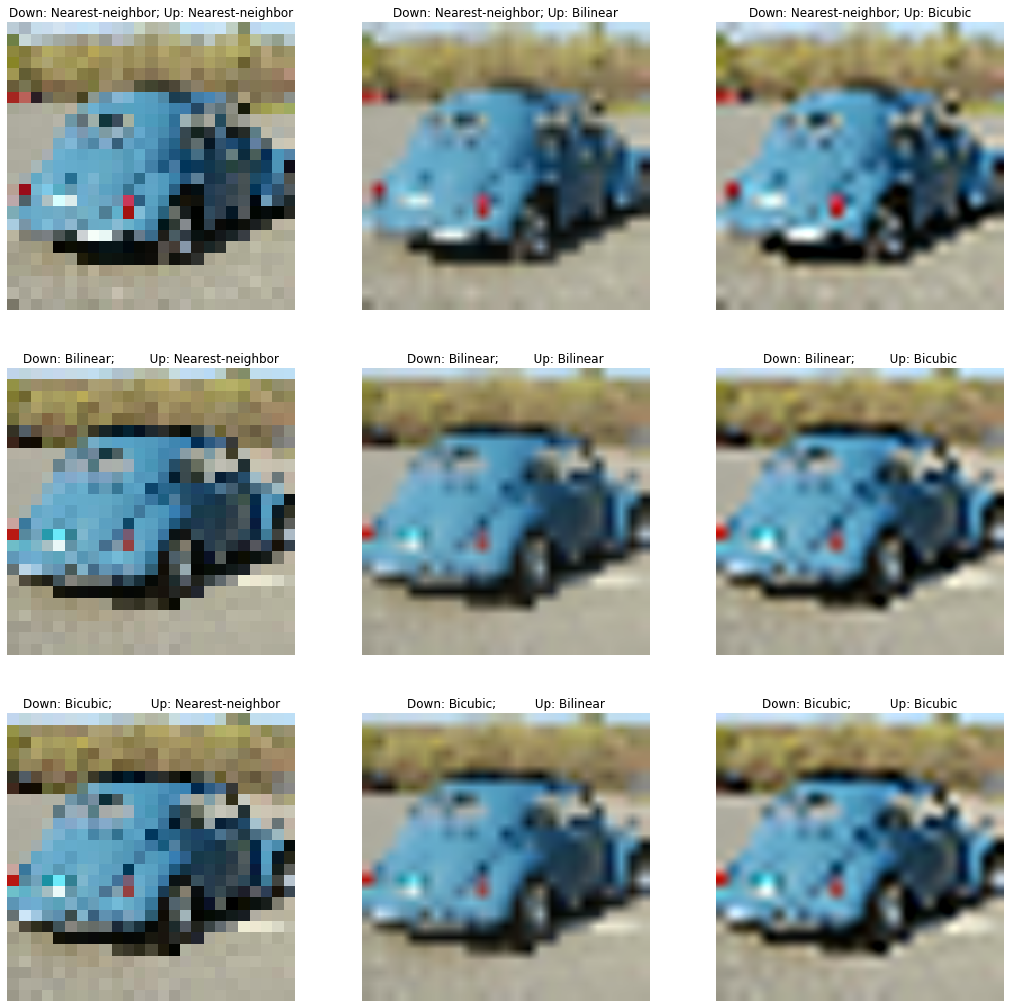

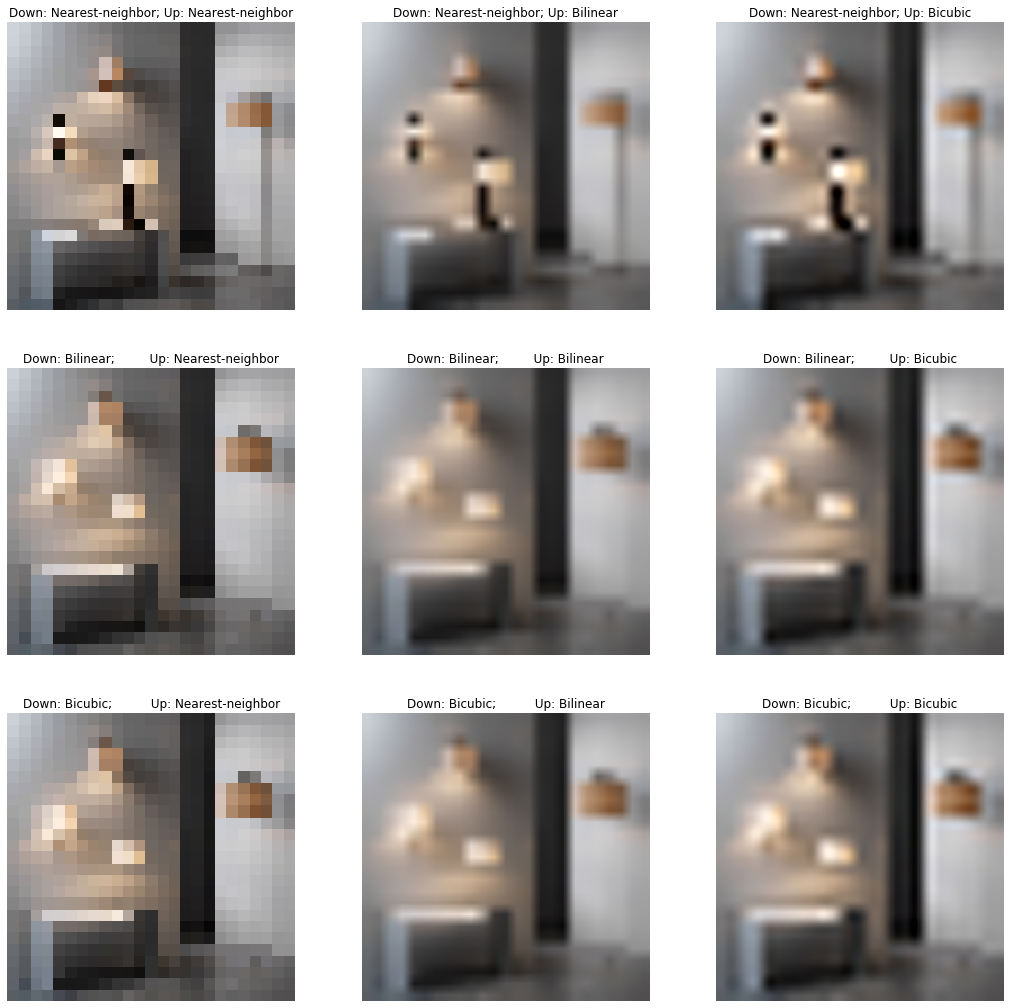

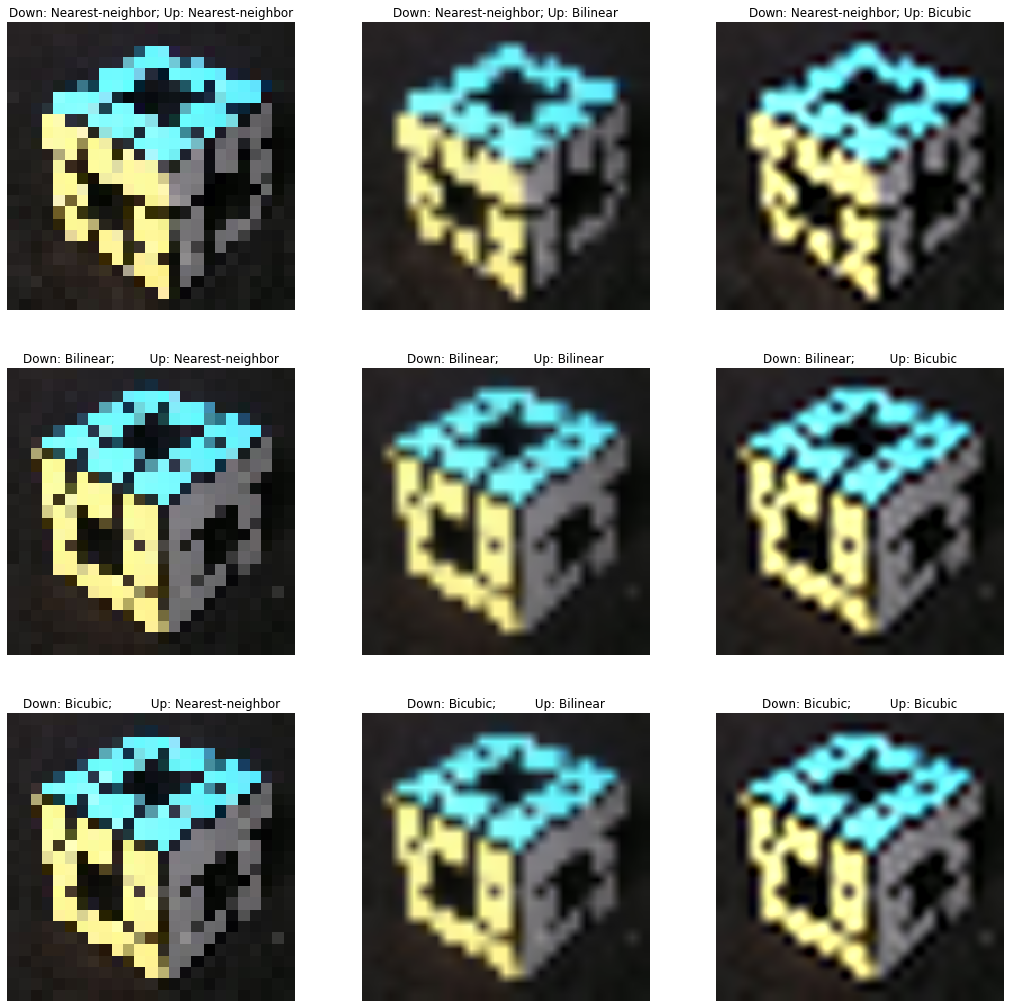

In [16]:
# reconstruction

inter = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC]
ratio = 0.1
title =  ['Down: Nearest-neighbor; Up: Nearest-neighbor',
          'Down: Nearest-neighbor; Up: Bilinear',
          'Down: Nearest-neighbor; Up: Bicubic',
          'Down: Bilinear;         Up: Nearest-neighbor',
          'Down: Bilinear;         Up: Bilinear',
          'Down: Bilinear;         Up: Bicubic',
          'Down: Bicubic;          Up: Nearest-neighbor',
          'Down: Bicubic;          Up: Bilinear',
          'Down: Bicubic;          Up: Bicubic']
beetle_r = []
lights_r = []
rubiks_r = []

for i in range(len(inter)):
    for j in range(len(inter)):
        # beetle
        beetle_size = (int(beetle.shape[1]*ratio), int(beetle.shape[0]*ratio))
        beetle_tmp = cv2.resize(beetle, beetle_size, interpolation=inter[i])
        beetle_size = (int(beetle.shape[1]), int(beetle.shape[0]))
        beetle_r.append(cv2.resize(beetle_tmp, beetle_size, interpolation=inter[j]))
        # lights
        lights_size = (int(lights.shape[1]*ratio), int(lights.shape[0]*ratio))
        lights_tmp = cv2.resize(lights, lights_size, interpolation=inter[i])
        lights_size = (int(lights.shape[1]), int(lights.shape[0]))
        lights_r.append(cv2.resize(lights_tmp, lights_size, interpolation=inter[j]))
        # rubiks
        rubiks_size = (int(rubiks.shape[1]*ratio), int(rubiks.shape[0]*ratio))
        rubiks_tmp = cv2.resize(rubiks, rubiks_size, interpolation=inter[i])
        rubiks_size = (int(rubiks.shape[1]), int(rubiks.shape[0]))
        rubiks_r.append(cv2.resize(rubiks_tmp, rubiks_size, interpolation=inter[j]))

# transform image to rgb    
for i in range(len(inter)**2):
    beetle_r[i] = beetle_r[i][:,:,::-1]
    lights_r[i] = lights_r[i][:,:,::-1]
    rubiks_r[i] = rubiks_r[i][:,:,::-1]

print('(iv) Reconstruction')

plt.figure(figsize=(18,18))
for i in range(len(inter)**2):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(beetle_r[i])

plt.figure(figsize=(18,18))
for i in range(len(inter)**2):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(lights_r[i])

plt.figure(figsize=(18,18))
for i in range(len(inter)**2):
    plt.subplot(3,3,i+1)
    plt.title(title[i])
    plt.axis('off')
    plt.imshow(rubiks_r[i])


Which interpolation combination do you think works best to reconstruct the original image?  
Among these 3 image reconstructions, I think downsampling by Bicubic interpolation and upsampling by Bilinear interpolation works best. The results of upsampling by nearest-neighbor interpolation are all terrible. I think that's because the nearest-neighbor interpolation for upsampling can only take the same value from its next pixel. That is the reason why the results contain a lot of blocks with the same color. The results of upsampling by Bicubic interpolation are not as smooth as using Bilinear interpolation. A lot of edges are sharper. However, I think many edges are not in the right place comparing to the original image.